In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
tsunamiDf =pd.read_csv("D:\google_hackathon\earthquake_data.csv")
del tsunamiDf['title']
del tsunamiDf['location']
del tsunamiDf['country']
del tsunamiDf['continent']
tsunamiDf

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


In [15]:
tsunamiDf.isnull().sum()

magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
dtype: int64

In [16]:
tsunamiDf["alert"].value_counts()

alert
green     325
yellow     56
orange     22
red        12
Name: count, dtype: int64

In [17]:
tsunamiDf["alert"]=tsunamiDf["alert"].fillna("red")
tsunamiDf.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [18]:
tsunamiDf["date_time"]=pd.to_datetime(tsunamiDf["date_time"])
tsunamiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   magnitude  782 non-null    float64       
 1   date_time  782 non-null    datetime64[ns]
 2   cdi        782 non-null    int64         
 3   mmi        782 non-null    int64         
 4   alert      782 non-null    object        
 5   tsunami    782 non-null    int64         
 6   sig        782 non-null    int64         
 7   net        782 non-null    object        
 8   nst        782 non-null    int64         
 9   dmin       782 non-null    float64       
 10  gap        782 non-null    float64       
 11  magType    782 non-null    object        
 12  depth      782 non-null    float64       
 13  latitude   782 non-null    float64       
 14  longitude  782 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 91.8+ KB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34668\1437582393.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tsunamiDf["date_time"]=pd.to_datetime(tsunamiDf["date_time"])


In [19]:
tsunamiDf["date_time"]=pd.DatetimeIndex(tsunamiDf["date_time"]).month
tsunamiDf["net"]

0      us
1      us
2      us
3      us
4      us
       ..
777    us
778    ak
779    us
780    us
781    us
Name: net, Length: 782, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
tsunamiDf["alert"]=le1.fit_transform(tsunamiDf["alert"])
tsunamiDf["magType"]=le2.fit_transform(tsunamiDf["magType"])
tsunamiDf["net"]=le3.fit_transform(tsunamiDf["net"])
tsunamiDf
import pickle
output1 = open('alert_encoder.pkl', 'wb')
output2 = open('magType_encoder.pkl', 'wb')
output3 = open('net_encoder.pkl', 'wb')
pickle.dump(le1, output1)
pickle.dump(le2, output2)
pickle.dump(le3, output3)
output1.close()
output2.close()
output3.close()

In [21]:
tsunamiDf.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
magnitude,1.000000,-0.011926,0.209549,0.285552,0.155730,-0.004726,0.515871,-0.105943,0.113114,-0.091403,-0.110626,0.050542,0.030644,-0.008552,-0.013911
date_time,-0.011926,1.000000,0.007002,-0.035238,-0.005672,-0.022028,-0.029189,0.034681,-0.014021,0.037502,-0.024953,0.079969,0.069213,-0.057292,0.028047
cdi,0.209549,0.007002,1.000000,0.317937,0.027426,0.160266,0.479788,-0.073884,-0.175417,0.006554,0.098143,0.243428,-0.097891,0.129003,-0.149048
mmi,0.285552,-0.035238,0.317937,1.000000,0.402772,-0.147363,0.442423,-0.108195,0.160417,-0.299074,-0.015723,-0.061865,-0.504439,0.144883,-0.005803
alert,0.155730,-0.005672,0.027426,0.402772,1.000000,-0.526716,0.228977,-0.070785,0.555403,-0.455290,0.001144,-0.388123,-0.228411,0.184431,0.082313
tsunami,-0.004726,-0.022028,0.160266,-0.147363,-0.526716,1.000000,-0.015500,-0.015190,-0.600231,0.400752,0.116360,0.340445,0.056814,-0.113209,-0.136778
sig,0.515871,-0.029189,0.479788,0.442423,0.228977,-0.015500,1.000000,-0.199378,-0.030100,-0.095318,0.114285,0.012673,-0.088667,0.204306,-0.190132
net,-0.105943,0.034681,-0.073884,-0.108195,-0.070785,-0.015190,-0.199378,1.000000,0.130493,0.097827,-0.148506,0.370464,0.050439,-0.267391,0.262395
nst,0.113114,-0.014021,-0.175417,0.160417,0.555403,-0.600231,-0.030100,0.130493,1.000000,-0.529371,-0.118812,-0.327961,-0.121982,0.144204,0.173665
dmin,-0.091403,0.037502,0.006554,-0.299074,-0.455290,0.400752,-0.095318,0.097827,-0.529371,1.000000,-0.021933,0.318009,0.168546,-0.238377,-0.097875


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'date_time'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'alert'}>,
        <Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>, <Axes: title={'center': 'net'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'magType'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

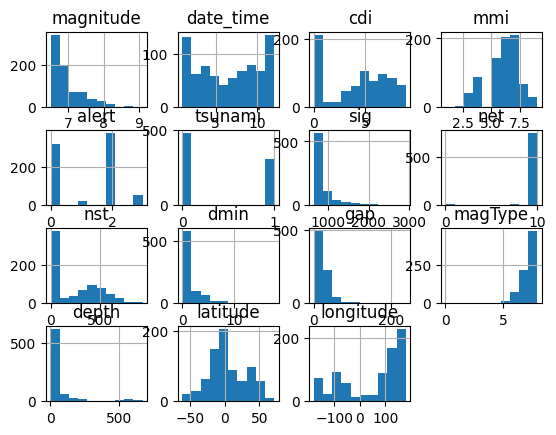

In [22]:
tsunamiDf.hist()

In [23]:
x=tsunamiDf.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14]]
y=tsunamiDf.iloc[:,[5]]

In [24]:
tsunamiDf["tsunami"].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [26]:
from collections import Counter
print(Counter(y_data))

Counter({'tsunami': 1})


In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

In [28]:
tsunamiInputMean = [] 
for columns in x_data.columns:
    tsunamiInputMean.append(x_data[columns].mean())
tsunamiInputStd = []
for columns in x_data.columns:
    tsunamiInputStd.append(x_data[columns].std())

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

## 1. Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression 
l1=LogisticRegression()
l1.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_pred=l1.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
tsunamiModelAccuracy = {'Logistic Regression': ac}
ac


81.77083333333334

In [33]:
filename = 'tsunamiLogisticRegressionModel.sav'

In [34]:
pickle.dump(l1, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))

In [36]:
result = loaded_model.score(x_test, y_test)
print(result)

0.8177083333333334


In [37]:
y_pred = loaded_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
x_test[0]
y_pred = loaded_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0]])
y_pred

array([0], dtype=int64)

In [39]:
filename = 'D:/google_hackathon/project/VoilaDisasterPredictor/model/earthquake/tsunamiLogisticRegressionModel.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.predict([[ month, cdi, mmi, alert, sig, net, nst, dmin, gap, magType, depth, latitude, longitude]])
result = loaded_model.predict([[1,0,0,0,0,0,0,0,0,0,0,0,0]])


In [40]:
result

array([0], dtype=int64)

## 2. SVM Model

In [41]:
from sklearn.svm import SVC 
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=2)

In [42]:
y_pred1=SVM.predict(x_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred1)*100
tsunamiModelAccuracy['SVM']= ac1
ac1

84.375

In [44]:
filename2 = 'tsunamiSVMModel.sav'
pickle.dump(SVM, open(filename2, 'wb'))

## 3. Gaussian NB

In [45]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [46]:
y_pred2=nb.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_test,y_pred2)*100
tsunamiModelAccuracy['Naive Bayes']= ac2
ac2

81.77083333333334

In [48]:
filename3 = 'tsunamiNbModel.sav'
pickle.dump(SVM, open(filename3, 'wb'))

## Ensemble

In [49]:
from sklearn.ensemble import VotingClassifier
bc=VotingClassifier(estimators=[("logisticRegression",l1),("svm",SVM),("naivebayes",nb)])
bc.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('logisticRegression', LogisticRegression()),
                             ('svm', SVC(kernel='linear', random_state=2)),
                             ('naivebayes', GaussianNB())])

In [50]:
y_pred3=bc.predict(x_test)
y_pred3

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_test,y_pred3)*100
tsunamiModelAccuracy['Ensemble']= ac3
ac3

82.8125

In [52]:
filename4 = 'tsunamiEnsembleModel.sav'
pickle.dump(SVM, open(filename4, 'wb'))

## Cross validation

In [53]:
from sklearn.model_selection import KFold
kf=KFold()
kf.split(x_train,y_train)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [54]:
from sklearn.model_selection import cross_val_predict
cross_pred=cross_val_predict(bc,x_test,y_test,cv=kf)
cross_pred

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\p

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [55]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(bc,x_train,y_train,cv=kf)
cross_score

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\p

array([0.83660131, 0.80392157, 0.81045752, 0.85620915, 0.80921053])

In [56]:
ac5=cross_score.mean()*100
ac5

82.328001375989